# Classification and Regression

## Fraud detection in account transactions using supervised classification techniques

### Performance comparison of Logistic and decisiontree classifier 

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [158]:
#importing models and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [126]:
#imporing preproccesors and sampling and dimensionality reduction from sklearn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [5]:
#importing linear regression supervised ML models from sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV,SGDRegressor

In [4]:
#!pip install -U imbalanced-learn

In [5]:
#!pip install sklearn

**Payments csv contains transaction history of several records of payment from source to destination account**

In [6]:
payments = pd.read_csv('payment_transactions.csv')

In [7]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
payments.shape

(6362620, 11)

In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
payments.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**The classes are imbalanced. We need to balance the classes using sampling techniques from imblearn package from scikit learn**

In [12]:
payments['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

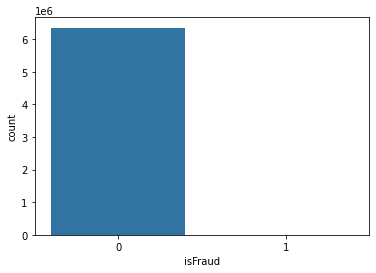

In [13]:
sns.countplot(x='isFraud',data=payments)

<AxesSubplot:xlabel='isFraud', ylabel='count'>

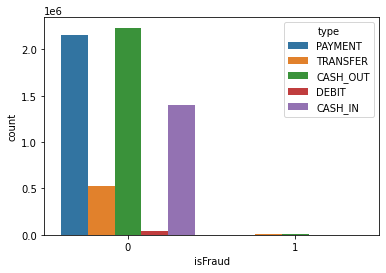

In [14]:
sns.countplot(x='isFraud',data=payments,hue='type')

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

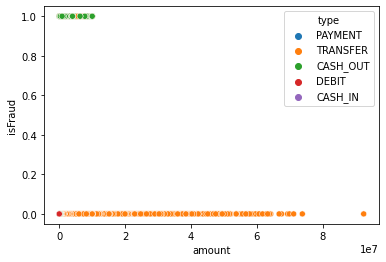

In [24]:
sns.scatterplot(x='amount',y='isFraud',data=payments,hue='type')

**The distribution of values for each attribute in the payments dataframe. We need to scale the values down to be in the same range**

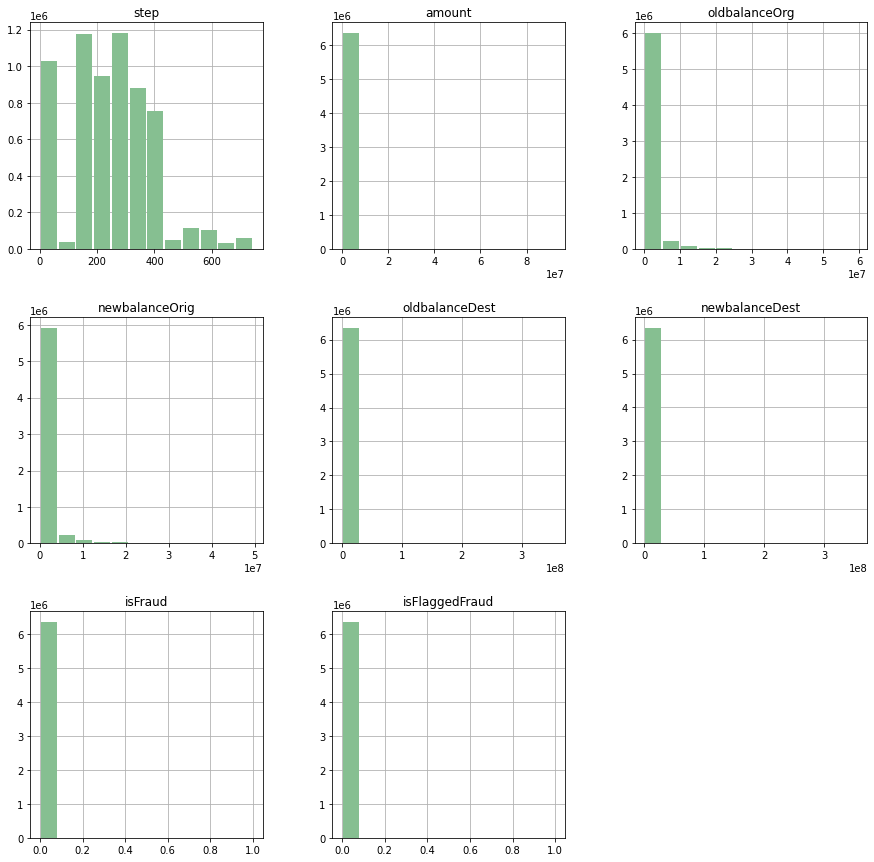

In [15]:
payments.hist(bins=12, figsize=(15,15),color='#86bf91', zorder=2, rwidth=0.9);
plt.show()

**The below heatmap shows the correlation between the attributes in the dataframe. There is no correlation between amount transferred to isFraud(target variable). Also there is no correleation between the account numbers and target variable. This shows that a transaction cannot be judged as fraud based on the amount of money transferred or based on the account numbers doing the transactions**

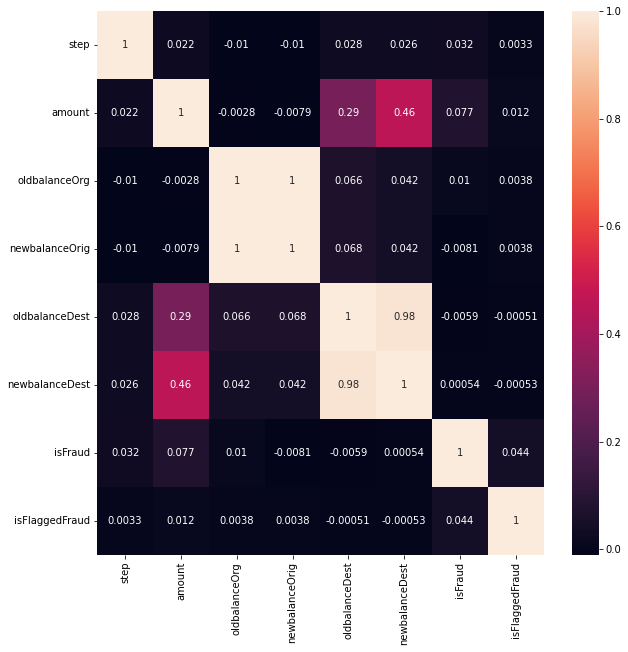

In [16]:
fig= plt.figure(figsize=(10,10))
cor = payments.corr()
sns.heatmap(cor,annot=True)
plt.show()

**Using label encoders to convert categorical values to numerical**

In [17]:
 #label encoder to encode catergorical values to numerical values
le = preprocessing.LabelEncoder()
payments['type'] = le.fit_transform(payments['type'])

In [18]:
X = payments.drop(columns=['isFraud','nameOrig','nameDest'])
y= payments['isFraud']

**Since there is high imbalance in the target classes 0 and 1, we will be using the SMOTETomek sampler to increase the samples of minority classes. Over-sampling using SMOTE and cleaning using Tomek links. Combine over- and under-sampling using SMOTE and Tomek links.**

In [19]:
sampler=SMOTETomek(sampling_strategy='minority',random_state=100)
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [20]:
y_sampled.value_counts()

0    6353883
1    6353883
Name: isFraud, dtype: int64

In [21]:
print(X_sampled.shape)
print(y_sampled.shape)

(12707766, 8)
(12707766,)


**Scaling down values using z-score standardisation from StandardScaler**

In [22]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_sampled)

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y_sampled,test_size=0.2,random_state=47)

In [61]:
y_train.shape

(10166212,)

**Defining the param dict for Logistic regression using Gridsearch cross validation method**

In [24]:
param_grid = [
{'penalty': ['l1'],'C': np.linspace(0.0001, 10, 5 )},
{'penalty': ['l2'],'C': np.linspace(0.0001, 10, 5 )}]
grid_log = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid_log.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.000000e-04, 2.500075e+00, 5.000050e+00, 7.500025e+00,
       1.000000e+01]),
                          'penalty': ['l1']},
                         {'C': array([1.000000e-04, 2.500075e+00, 5.000050e+00, 7.500025e+00,
       1.000000e+01]),
                          'penalty': ['l2']}])

In [25]:
print("Test set score: {:.2f}".format(grid_log.score(X_test,y_test)))
print("Best parameters: {}".format(grid_log.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_log.best_score_))
print("Best estimator:\n{}".format(grid_log.best_estimator_))

Test set score: 0.94
Best parameters: {'C': 10.0, 'penalty': 'l2'}
Best cross-validation score: 0.94
Best estimator:
LogisticRegression(C=10.0)


**Using the best estimator for prediction**

In [26]:
model = LogisticRegression(penalty= 'l2',C=10.0)

In [27]:
model.fit(X_train,y_train)

LogisticRegression(C=10.0)

In [28]:
predictions = model.predict(X_test)

In [55]:
print('Root mean square error {:.2f}'.format(mean_squared_error(y_test,predictions,squared=False)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,predictions)))

Root mean square error 0.25
Accuracy score 0.94


**It is a good accuracy score. Also the rmse is only 0.25. i.e the difference between true and predicted is only 0.25**
**In this example False Positive is a higher concern than False Negatives, so we must note the precision. Precision is correctly classified positive cases to total number of predicted positive cases**

In [51]:
print('classification report\n',classification_report(y_test,predictions))

classification report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94   1271739
           1       0.97      0.91      0.93   1269815

    accuracy                           0.94   2541554
   macro avg       0.94      0.94      0.94   2541554
weighted avg       0.94      0.94      0.94   2541554



confusion matrix
 [[1231024   40715]
 [ 120267 1149548]]


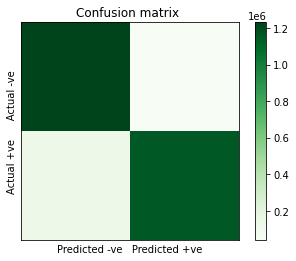

In [56]:
cm = confusion_matrix(y_test,predictions)
print('confusion matrix\n',cm)

plt.imshow(cm, cmap=plt.cm.Greens)
plt.xlabel("Predicted -ve   Predicted +ve")
plt.ylabel("Actual +ve      Actual -ve")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()


**Perfomance of DecisionTree classifier**

**Defining the param dict for DT classifier**

In [58]:
param_grid = [ {'max_depth': np.arange(2, 10, 2), 'min_samples_split': np.arange(2, 10, 2), 'max_leaf_nodes' : np.arange(2, 10, 2)}]
grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid_DT.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([2, 4, 6, 8]),
                          'max_leaf_nodes': array([2, 4, 6, 8]),
                          'min_samples_split': array([2, 4, 6, 8])}])

In [60]:
print("Test set score: {:.2f}".format(grid_DT.score(X_test,y_test)))
print("Best parameters: {}".format(grid_DT.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_DT.best_score_))
print("Best estimator:\n{}".format(grid_DT.best_estimator_))

Test set score: 0.50
Best parameters: {'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_split': 2}
Best cross-validation score: 0.95
Best estimator:
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)


**Using the best estimator with best parameters to predict our values**

In [61]:
mod = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_split=2)

In [62]:
mod.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)

In [64]:
predictions = mod.predict(X_test)

In [65]:
print('Root mean square error {:.2f}'.format(mean_squared_error(y_test,predictions,squared=False)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,predictions)))

Root mean square error 0.71
Accuracy score 0.50


**The accuracy is low and also the rmse is high. DT has poor precision for both 0 and 1 classes**

**Logistic regression has better performance when compared with tree method**

In [66]:
print('classification report\n',classification_report(y_test,predictions))

classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00   1271739
           1       0.50      1.00      0.67   1269815

    accuracy                           0.50   2541554
   macro avg       0.25      0.50      0.33   2541554
weighted avg       0.25      0.50      0.33   2541554



confusion matrix
 [[1231024   40715]
 [ 120267 1149548]]


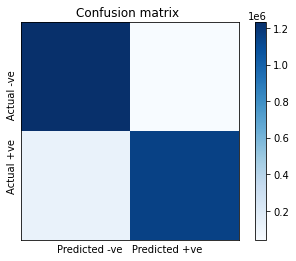

In [63]:
cm = confusion_matrix(y_test,predictions)
print('confusion matrix\n',cm)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted -ve   Predicted +ve")
plt.ylabel("Actual +ve      Actual -ve")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

**Thus, this concludes our classification experiment on fraud transaction detection. Logistic regression is a better classifier with a precision of 0.91 for 0 and 0.97 for 1 classes.**

## Predicting house prices using several regression methods

**Using the house prices dataset from kaggle competition**

In [99]:
prices = pd.read_csv('House_price.csv')

In [100]:
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [101]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [102]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [103]:
prices.shape

(1460, 81)

**Let's analyse the null values**

In [104]:
prices.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**calculating the percentage of null values in each column and dropping the columns having a percentage of more than 50%**

In [105]:
cols = prices.columns
n = prices.shape[0]
cols_to_drop=[]
for c in cols:
    m = prices[c].isnull().sum()
    pct = m/n
    if pct > 0.5:
        cols_to_drop.append(c)
print('The following columns will be dropped:',cols_to_drop)

The following columns will be dropped: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [106]:
prices = prices.drop(columns=cols_to_drop)    

**printing columns having null values less than 50%**

In [107]:
cols = prices.columns
cols_null_values = [c for c in cols if prices[c].isnull().any()]
cols_null_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

**Separating the dataframe into numerical and categorical columns**

In [108]:
prices_num = prices.select_dtypes(exclude='object')
prices_cat = prices.select_dtypes(include='object')

**Filling the numerical columns with mean of its column. Since the columns are about square areas of the lot or garage, it makes sense to fill with mean of the value in a certain geographical area**

In [109]:
cols_num = prices_num.columns
for c in cols_num:
    if prices_num[c].isnull().any():
        prices_num[c].fillna(value=prices_num[c].mean(),inplace=True)

**Fiiling the null values in the categorical columns with the most repeated value**

In [111]:
prices_cat = prices_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

**Using label encoders to convert the categorical value to numerical values**

In [115]:
le = preprocessing.LabelEncoder()
prices_cat = prices_cat.apply(le.fit_transform)

**Combining the numerical and numerically encoded categorical columns** 

In [118]:
prices_clean= pd.concat([prices_num,prices_cat],axis=1)

**Size of the final cleaned dataset**

In [147]:
prices_clean.shape

(1460, 77)

**There are several features in the dataset as shown in the heatmap below**

**Let's use a dimensionality reduction technique called principal component analysis(PCA) to reduce the number of features but retain the information contained in entire dataset**

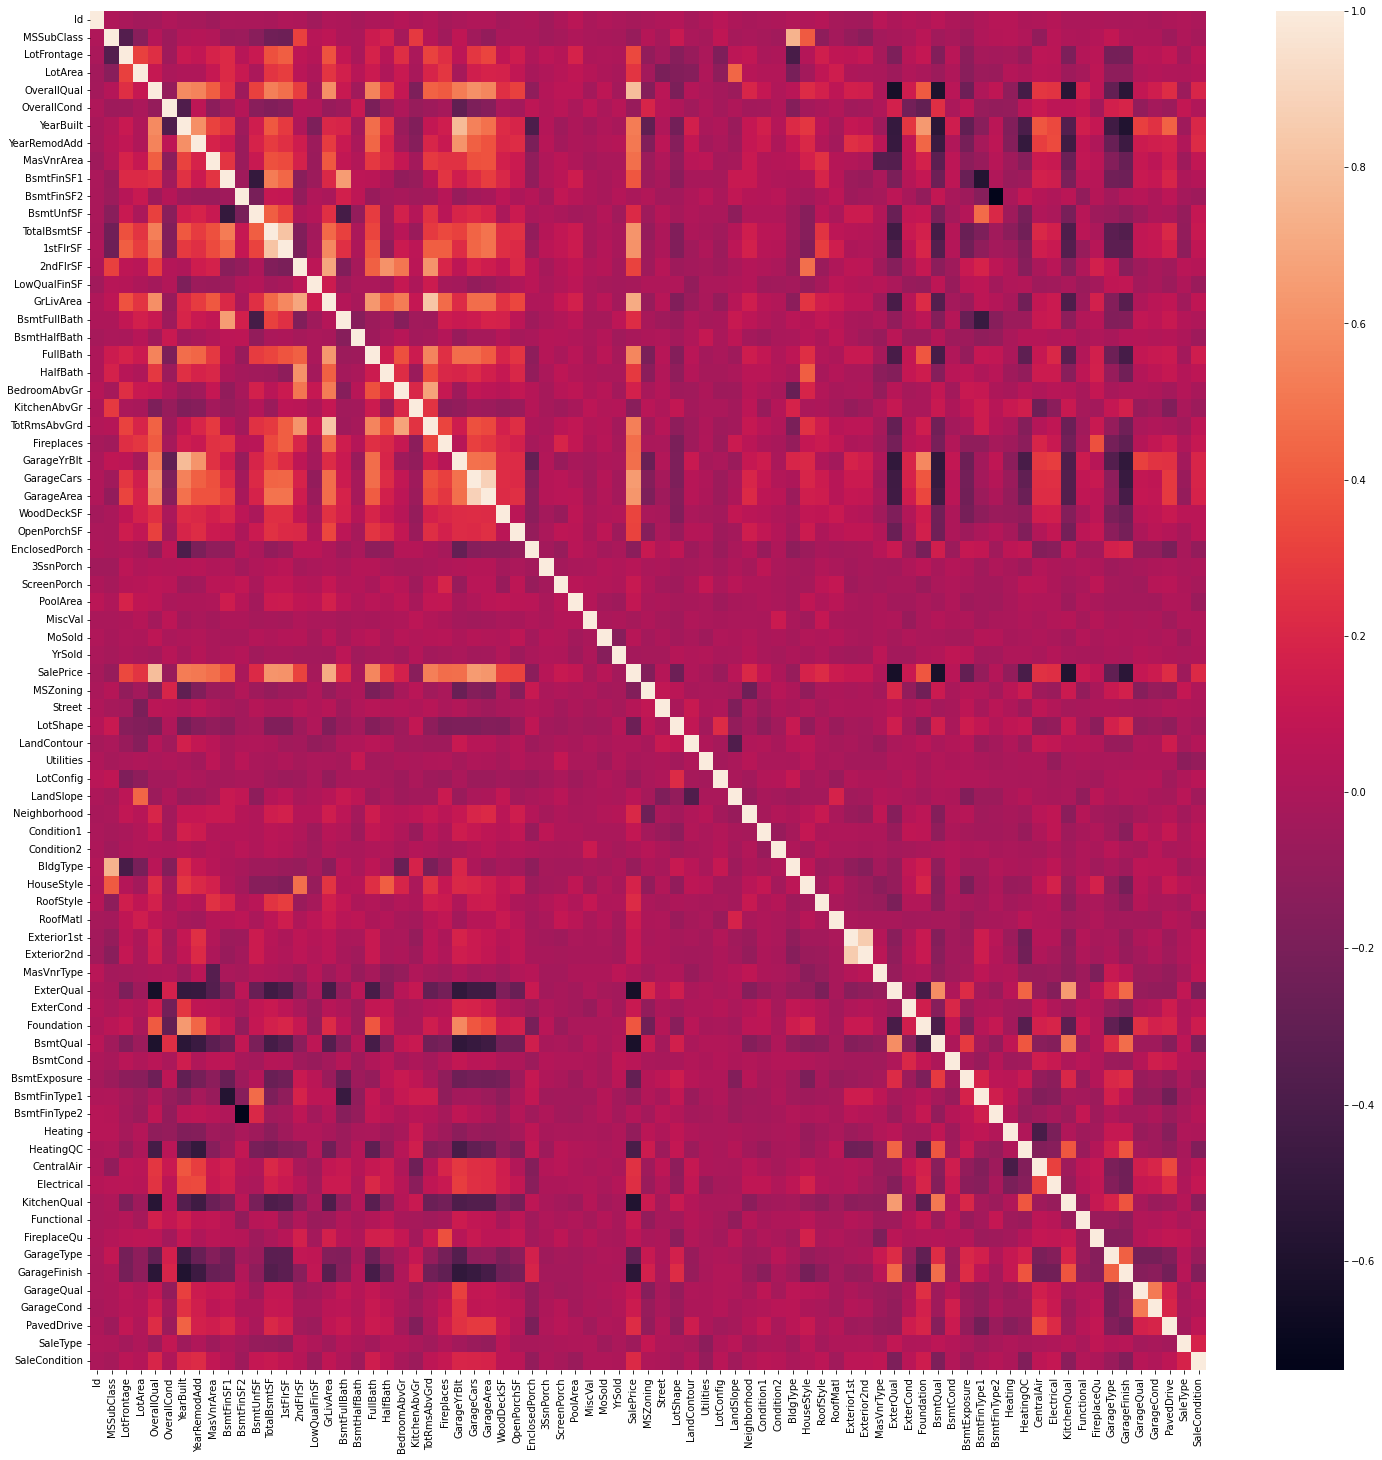

In [125]:
fig = plt.figure(figsize=(25,25))
corr = prices_clean.corr()
sns.heatmap(corr)
plt.show()

In [127]:
X=prices_clean.drop(['SalePrice'],axis=1)
y=prices_clean['SalePrice']

**It is important to scale down the values to the same range before using the PCA technique to reduce the error**

In [128]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

**Reducing the number of features to 60**

In [186]:
pca_60 = PCA(n_components=60,random_state=45)
X_pca = pca_60.fit_transform(X_scaled)

**The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.**

In [187]:
print("Variance explained by all 60 principal components {:.3f}".format(sum(pca_60.explained_variance_ratio_ *100)))

Variance explained by all 60 principal components 96.258


**The first component alone captures 13.63% of variability of the data and 1st and 2nd component combined together captures 18.94% of data variablity and so on..The 60 components combined together provides 96.25% of data variability. i.e the number of components have been reduced to 60 and 96.25% of information have been captured from the entire dataset**

In [188]:
np.cumsum(pca_60.explained_variance_ratio_ *100)

array([13.6362621 , 18.94948159, 23.81404122, 27.77960231, 30.79942593,
       33.54226236, 35.9281147 , 38.19169729, 40.27057886, 42.32170502,
       44.29139299, 46.17329894, 47.96827684, 49.72533756, 51.41318912,
       53.00893877, 54.57663793, 56.10791392, 57.61053748, 59.09159103,
       60.54061379, 61.98028119, 63.40015468, 64.79498137, 66.14073779,
       67.44711343, 68.71309292, 69.94493306, 71.16863986, 72.32017459,
       73.45421514, 74.58022352, 75.69811585, 76.78648424, 77.86460203,
       78.88727844, 79.89423252, 80.88576398, 81.8448119 , 82.79360811,
       83.69780338, 84.58679654, 85.42981798, 86.27022521, 87.07124274,
       87.85155679, 88.61424467, 89.33923942, 90.03688562, 90.7290534 ,
       91.38341407, 92.00122594, 92.606887  , 93.18859042, 93.74836225,
       94.28449555, 94.78952441, 95.29211922, 95.78595999, 96.25811199])

**This is depicted graphically**

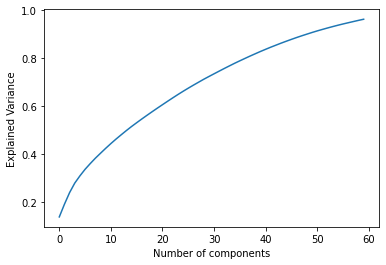

In [189]:
plt.plot(np.cumsum(pca_60.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance');

[Principal Component Analysis - Sklearn execution](https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0)

[Principal Component Analysis - Mathematical Explanation](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In [190]:
X_train,X_test,y_train,y_test= train_test_split(X_pca,y,test_size=0.2,random_state=47)

**Using various regression models to decide which works better**

**It seems that SGDRegressor performs better for this case**

In [191]:
models = [LinearRegression(),Lasso(),Ridge(),ElasticNetCV(),SGDRegressor()]

for model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(model)
    print('R2 score:{:.2f}'.format(r2_score(y_test,predictions)))
    print('Root mean squared error :{:.2f}'.format(mean_squared_error(y_test,predictions,squared=False)))
    print('*********************************************************')
    

LinearRegression()
R2 score:0.51
Root mean squared error :56910.69
*********************************************************
Lasso()
R2 score:0.51
Root mean squared error :56904.78
*********************************************************
Ridge()
R2 score:0.51
Root mean squared error :56884.73
*********************************************************
ElasticNetCV()
R2 score:0.07
Root mean squared error :78928.35
*********************************************************
SGDRegressor()
R2 score:0.53
Root mean squared error :55926.25
*********************************************************


**Optimizing the performance of SGDRegressor using the Gridsearch cross validation method**

In [172]:
param_grid = [
{'penalty': ['l1'],'alpha': np.linspace(0.0001, 10, 5 )},
{'penalty': ['l2'],'alpha': np.linspace(0.0001, 10, 5 )}]
grid_SGD = GridSearchCV(SGDRegressor(), param_grid, cv=5)
grid_SGD.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'alpha': array([1.000000e-04, 2.500075e+00, 5.000050e+00, 7.500025e+00,
       1.000000e+01]),
                          'penalty': ['l1']},
                         {'alpha': array([1.000000e-04, 2.500075e+00, 5.000050e+00, 7.500025e+00,
       1.000000e+01]),
                          'penalty': ['l2']}])

In [192]:
print("Test set score: {:.2f}".format(grid_SGD.score(X_test,y_test)))
print("Best parameters: {}".format(grid_SGD.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_SGD.best_score_))
print("Best estimator:\n{}".format(grid_SGD.best_estimator_))

Test set score: 0.52
Best parameters: {'alpha': 7.500025, 'penalty': 'l1'}
Best cross-validation score: 0.86
Best estimator:
SGDRegressor(alpha=7.500025, penalty='l1')


**Using the best estimator with best parameter for our final model to predict the house prices**

**The model predicts prices with a price difference of $57,000 between the actual and predicted house prices**

**There is room for improvement in model optimization**

In [193]:
best_SGD = SGDRegressor(alpha=7.500025, penalty='l1')
best_SGD.fit(X_train,y_train)
pred = best_SGD.predict(X_test)
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))
print('Root mean squared error:{:.2f}'.format(mean_squared_error(y_test,pred,squared=False)))

R2 Score:0.51
Root mean squared error:57339.06
